<h1 style="text-align: center;">Data Preparation</h1>
<h2 style="text-align: center;">Bank Marketing</h2>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 24/07/2024

---

# Introdução

A preparação dos dados é uma etapa fundamental no ciclo de vida de um projeto de ciência de dados. O objetivo principal desta fase é transformar dados brutos e heterogêneos em um formato limpo e estruturado, pronto para ser utilizado na modelagem. Esta transformação é essencial para garantir a acurácia e a eficiência dos modelos preditivos que serão desenvolvidos posteriormente. A preparação dos dados envolve várias atividades, incluindo a limpeza, a transformação e a integração dos dados, cada uma delas crucial para eliminar inconsistências e preencher lacunas identificadas na fase de Entendimento dos Dados.

A importância da preparação dos dados não pode ser subestimada, pois dados mal preparados podem levar a modelos imprecisos e conclusões enganosas. A fase de Entendimento dos Dados forneceu insights valiosos sobre a qualidade e a estrutura dos dados, identificando problemas como dados faltantes, outliers e a necessidade de normalização. Agora, com essas informações, podemos proceder à preparação dos dados de maneira sistemática e eficaz. Esta fase conecta diretamente com as fases anteriores de Entendimento do Negócio e Entendimento dos Dados, assegurando que as ações tomadas sejam alinhadas com os objetivos do projeto e baseadas em uma compreensão profunda dos dados disponíveis.

# Revisão das Propostas de Alterações

Durante a fase de Entendimento dos Dados, várias propostas de alterações foram sugeridas para melhorar a qualidade dos dados. Entre as principais propostas estavam:

- Remoção de Outliers: Identificamos valores extremos que poderiam distorcer as análises e os resultados dos modelos. A remoção desses outliers foi justificada pela análise estatística que mostrou que esses valores não representavam o comportamento típico dos dados.

- Imputação de Valores Ausentes: Detectamos que alguns registros tinham dados faltantes. A imputação desses valores é crucial para manter a integridade do conjunto de dados. Métodos como imputação pela média, mediana ou modas foram sugeridos com base na natureza das variáveis afetadas.

- Transformação de Variáveis Categóricas em Numéricas: Variáveis categóricas foram identificadas como necessárias para transformação, uma vez que a maioria dos algoritmos de aprendizado de máquina requer variáveis numéricas. Técnicas como one-hot encoding foram recomendadas para essa transformação.

- Normalização e Padronização de Dados: Algumas variáveis precisavam ser normalizadas ou padronizadas para garantir que todas estivessem na mesma escala, facilitando o processo de modelagem e aumentando a precisão dos modelos.

Essas propostas foram fundamentadas na análise dos dados realizada anteriormente e visavam eliminar inconsistências, melhorar a qualidade dos dados e prepará-los para a modelagem preditiva.

# Implementação das Alterações

A implementação das ações de preparação dos dados seguiu um processo detalhado e sistemático:

## Biblioteca utilizadas

1) pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib -> gráficos;

5) seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos

In [1]:
# Instalação das bibliotecas

# %pip install pandas

# %pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

# %pip install seaborn

In [2]:
# Importação das bibliotecas

import pandas as pd

import numpy as np

from scipy.stats import boxcox
from scipy.stats import mstats

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from ucimlrepo import fetch_ucirepo 

from IPython.display import display, Markdown

In [3]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")

In [4]:
# Configurando o modo de exibição do pandas
pd.options.display.float_format = "{:.4f}".format

## Coletando os dados

In [5]:
# Baixando os dados
bank_marketing = fetch_ucirepo(id=222)

In [6]:
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [7]:
# Criando variável que vai ter as variáveis transformada
Xt = X.copy()

## Imputação de Valores Ausentes

Aplicamos diferentes técnicas de imputação dependendo da variável. Por exemplo, para variáveis numéricas, usamos a média ou a mediana, e para variáveis categóricas, a moda.

### Trabalho

Para corrigir os 216 valores ausentes da variável *job*, é importante verificar se esses valores ausentes se encaixam melhor nas categorias predominantes: *blue-collar* (trabalhadores manuais) ou *management* (gerentes).  Antes de simplesmente substituir os valores ausentes pela moda, é fundamental analisar se a variável que indica o salário médio dos valores ausentes está dentro do intervalo de salário dos trabalhadores manuais, bem como verificar se a idade dos clientes também está dentro desse intervalo.

In [8]:
filtered_job_bc = X[X['job'] == 'blue-collar'][['balance', 'age']]
filtered_job_mt = X[X['job'] == 'management'][['balance', 'age']]
filtered_job_null = X[X['job'].isnull()][['balance', 'age']].sort_index()

results = pd.DataFrame({
    'Category': ['blue-collar', 'management', 'null'],
    'Balance Max': [
        filtered_job_bc['balance'].max(),
        filtered_job_mt['balance'].max(),
        filtered_job_null['balance'].max()
    ],
    'Balance Min': [
        filtered_job_bc['balance'].min(),
        filtered_job_mt['balance'].min(),
        filtered_job_null['balance'].min()
    ],
    'Balance Mean': [
        filtered_job_bc['balance'].mean(),
        filtered_job_mt['balance'].mean(),
        filtered_job_null['balance'].mean()
    ],
    'Age Max': [
        filtered_job_bc['age'].max(),
        filtered_job_mt['age'].max(),
        filtered_job_null['age'].max()
    ],
    'Age Min': [
        filtered_job_bc['age'].min(),
        filtered_job_mt['age'].min(),
        filtered_job_null['age'].min()
    ],
    'Age Mean': [
        filtered_job_bc['age'].mean(),
        filtered_job_mt['age'].mean(),
        filtered_job_null['age'].mean()
    ]
})

# Exibir a tabela de resultados
print(results)

      Category  Balance Max  Balance Min  Balance Mean  Age Max  Age Min  \
0  blue-collar        66653        -8019     1078.8267       75       20   
1   management       102127        -6847     1763.6168       81       21   
2         null        19706         -295     1772.3576       82       25   

   Age Mean  
0   40.0441  
1   40.4496  
2   47.5938  


Na tabela acima, observamos as estatísticas descritivas para as variáveis *balance* e *age* em três categorias de trabalho: *blue-collar*, *management* e *valores ausentes* (null).

Para a categoria *null*, o valor médio de *balance* é mais próximo do observado para os gerentes (management), e a idade está dentro do intervalo observado para os gerentes, exceto por um ano na idade máxima. Portanto, com base nessa análise, é mais apropriado classificar os valores ausentes como pertencentes à categoria management.

In [9]:
Xt['job'] = Xt['job'].fillna('management')

### Educação

Vamos aplicar a mesma metodologia utilizada anteriormente para tratar os 1.857 valores ausentes da variável *education*. É essencial verificar se esses valores ausentes se encaixam melhor nas categorias predominantes: *secondary* ou *tertiary*. Antes de simplesmente substituir os valores ausentes pela moda, devemos analisar se a moda da variável *job* para os valores ausentes é consistente com a moda das classes de educação. Além disso, é crucial verificar se a idade dos clientes está dentro do intervalo das idades típicas para essas categorias de educação.

In [10]:
filtered_ed_s = X[X['education'] == 'secondary'][['job', 'age']]
filtered_ed_t = X[X['education'] == 'tertiary'][['job', 'age']]
filtered_ed_null = X[X['education'].isnull()][['job', 'age']].sort_index()

results = pd.DataFrame({
    'Category': ['secondary', 'tertiary', 'null'],
    'Job Mode': [
        filtered_ed_s['job'].mode()[0],
        filtered_ed_t['job'].mode()[0],
        filtered_ed_null['job'].mode()[0]
    ],
    'Age Max': [
        filtered_ed_s['age'].max(),
        filtered_ed_t['age'].max(),
        filtered_ed_null['age'].max()
    ],
    'Age Min': [
        filtered_ed_s['age'].min(),
        filtered_ed_t['age'].min(),
        filtered_ed_null['age'].min()
    ],
    'Age Mean': [
        filtered_ed_s['age'].mean(),
        filtered_ed_t['age'].mean(),
        filtered_ed_null['age'].mean()
    ]
})

# Exibir a tabela de resultados
print(results)

    Category     Job Mode  Age Max  Age Min  Age Mean
0  secondary  blue-collar       95       18   39.9643
1   tertiary   management       89       20   39.5936
2       null  blue-collar       93       18   44.5105


Na tabela acima, são apresentadas as estatísticas descritivas para as variáveis *job* e *age* nas três categorias de educação: *secondary*, *tertiary* e *valores ausentes* (null).

Para a categoria *null*, observamos que a maioria dos clientes trabalha como *blue-collar*, o que é consistente com a moda da categoria *secondary*. Além disso, a idade dos clientes com valores ausentes está majoritariamente dentro do intervalo observado para o nível de educação *secondary*. Embora haja um leve aumento na média das observações com valores ausentes, as demais estatísticas estão em conformidade com o padrão dessa categoria. Com base nessa análise, é mais apropriado classificar os valores ausentes como pertencentes à categoria *secondary*.

### Contato

Vamos aplicar a mesma metodologia utilizada anteriormente para tratar os 13.020 valores ausentes da variável *contact*. É essencial verificar se esses valores ausentes se encaixam melhor nas categorias predominantes: *cellular* ou *telephone*. Antes de simplesmente substituir os valores ausentes pela moda, devemos analisar se a moda da variável *contact* para os valores ausentes é consistente com a moda das classes de contato. Além disso, é crucial verificar se a idade e salário médio dos clientes está dentro do intervalo das idades típicas para essas categorias de contato.

In [11]:
filtered_ed_s = X[X['contact'] == 'cellular'][['balance', 'age']]
filtered_ed_t = X[X['contact'] == 'telephone'][['balance', 'age']]
filtered_ed_null = X[X['contact'].isnull()][['balance', 'age']].sort_index()

results = pd.DataFrame({
    'Category': ['cellular', 'telephone', 'null'],
    'Balance Max': [
        filtered_ed_s['balance'].max(),
        filtered_ed_t['balance'].max(),
        filtered_ed_null['balance'].max()
    ],
    'Balance Min': [
        filtered_ed_s['balance'].min(),
        filtered_ed_t['balance'].min(),
        filtered_ed_null['balance'].min()
    ],
    'Balance Mean': [
        filtered_ed_s['balance'].mean(),
        filtered_ed_t['balance'].mean(),
        filtered_ed_null['balance'].mean()
    ],
    'Age Max': [
        filtered_ed_s['age'].max(),
        filtered_ed_t['age'].max(),
        filtered_ed_null['age'].max()
    ],
    'Age Min': [
        filtered_ed_s['age'].min(),
        filtered_ed_t['age'].min(),
        filtered_ed_null['age'].min()
    ],
    'Age Mean': [
        filtered_ed_s['age'].mean(),
        filtered_ed_t['age'].mean(),
        filtered_ed_null['age'].mean()
    ]
})

print(results)

    Category  Balance Max  Balance Min  Balance Mean  Age Max  Age Min  \
0   cellular       102127        -8019     1397.9270       94       18   
1  telephone        98417        -1965     1803.7041       95       18   
2       null        58544        -3372     1183.5504       61       20   

   Age Mean  
0   40.4008  
1   47.8379  
2   40.6001  


A tabela acima mostra as estatísticas descritivas para as variáveis *balance* e *age* em relação às três categorias de contato: *cellular*, *telephone* e *valores ausentes* (null).

Para a categoria *null*, observamos que as métricas de *balance* e a faixa etária dos clientes estão compatíveis com os intervalos das categorias *cellular* e *telephone*. O valor médio de *balance* e a média de *age* para os registros ausentes são mais próximos das observações na categoria *cellular*. Com base nesta análise, é razoável atribuir os valores ausentes à categoria *cellular*.

In [12]:
Xt['contact'] = Xt['contact'].fillna('cellular')

### P resultado

A variável *poutcome* poderia ser uma adição valiosa ao modelo de machine learning, pois indica o resultado de campanhas de marketing anteriores. Clientes que já realizaram uma conversão com o banco têm uma probabilidade maior de converter em campanhas futuras. No entanto, dado que essa variável possui 36.959 valores ausentes em um total de 45.211 observações, optamos por ajustar o modelo sem incluir essa variável.

In [13]:
Xt.drop(columns=['poutcome'], inplace=True)

## Remoção de Outliers, Normalização e Padronização de Dados

Nesta sessão, abordamos a remoção de outliers, a normalização e a padronização dos dados para garantir a qualidade e a consistência das análises subsequentes. As etapas específicas realizadas incluem:

1. **Remoção de Outliers**: Para mitigar o impacto dos valores extremos nos dados, aplicamos a técnica de winsorização, truncando os valores mais baixos e mais altos com base em percentis específicos. Isso ajudou a reduzir a influência dos outliers sem eliminar completamente os dados.
2. **Normalização**: Após a remoção dos outliers, normalizamos as variáveis para o intervalo [0, 1]. Este processo rescalou os dados, garantindo que todas as variáveis numéricas tivessem a mesma escala, facilitando comparações diretas entre elas.
3. **Padronização**: Além da normalização, aplicamos a padronização para variáveis com diferentes unidades de medida. A padronização transformou os dados de forma que cada variável tivesse uma média de 0 e um desvio padrão de 1, eliminando as discrepâncias causadas por diferentes escalas e unidades.

## Idade

A transformação aplicada à variável age consistiu em duas etapas principais. Primeiramente, para reduzir a assimetria positiva e lidar com outliers de idades extremas, foi utilizada a função logarítmica da variável age elevada a $\frac{1}{2.15}$. Esta transformação ajudou a mitigar a influência dos valores extremos e a melhorar a simetria da distribuição.

Na etapa seguinte, a variável transformada foi submetida a uma winsorização com limites específicos para truncar os valores extremos. Os limites utilizados foram [0.003, 0.001], significando que os 0,3% dos menores valores foram substituídos pelo valor no percentil de 0,3%, e os 0,1% dos maiores valores foram substituídos pelo valor no percentil de 99,9%. Esse procedimento ajudou a reduzir o impacto dos outliers extremos na análise.

Após a winsorização, a variável foi normalizada para o intervalo [0, 1], a fim de padronizar a escala com as outras variáveis numéricas e facilitar a comparação e análise subsequente.

In [14]:
Xt['age'] = mstats.winsorize(np.log(X['age'])**(1/2.15), limits=[0.003, 0.001])
Xt['age'] = (Xt['age'] - Xt['age'].min()) / (Xt['age'].max() - Xt['age'].min())

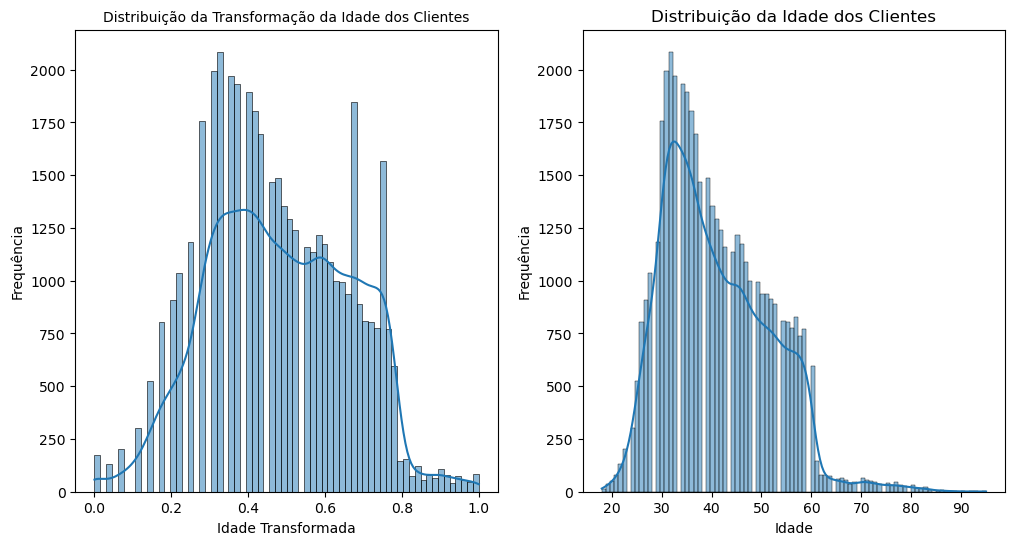

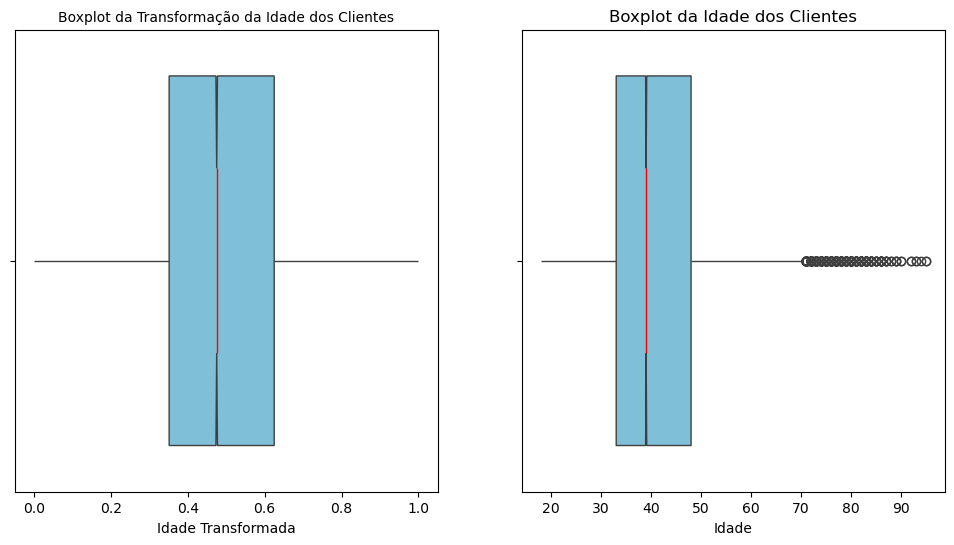

In [15]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["age"], kde=True)
plt.title("Distribuição da Transformação da Idade dos Clientes", fontsize=10)
plt.xlabel("Idade Transformada")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.histplot(X["age"], kde=True)
plt.title("Distribuição da Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(Xt["age"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Transformação da Idade dos Clientes", fontsize=10)
plt.xlabel("Idade Transformada")
plt.subplot(1, 2, 2)
sns.boxplot(X["age"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Idade dos Clientes")
plt.xlabel("Idade")
plt.show()

### Equilibrio

Para aprimorar a qualidade dos dados da variável *balance*, adotou-se uma abordagem em duas etapas. Primeiramente, foi aplicada a transformação do módulo seguida da raiz sétima. Especificamente, o valor absoluto da variável *balance* foi elevado a $\frac{1}{7}$ (ou seja, a raiz sétima). Essa transformação ajudou a reduzir significativamente a assimetria dos dados, embora não tenha eliminado completamente os outliers ou ajustado todas as observações com valor zero.

Em seguida, foi realizada a winsorização dos dados transformados com limites [0.1, 0.03]. Isso significa que os 10% dos valores mais baixos foram substituídos pelo valor no percentil de 10%, e os 3% dos valores mais altos foram substituídos pelo valor no percentil de 97%. Essa etapa visou minimizar o impacto dos outliers extremos.

Por fim, a variável *balance* foi normalizada para o intervalo [0, 1] para padronizar a escala com as demais variáveis numéricas e facilitar análises futuras.

In [16]:
Xt['balance'] = mstats.winsorize(np.sqrt(X['balance']**2) ** (1/7), limits=[0.1, 0.03])
Xt['balance'] = (Xt['balance'] - Xt['balance'].min()) / (Xt['balance'].max() - Xt['balance'].min())

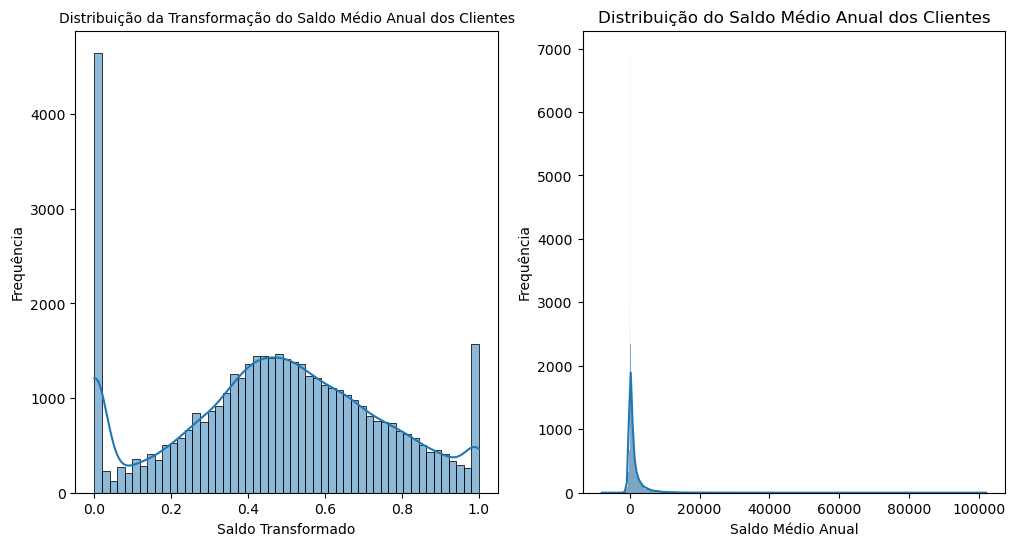

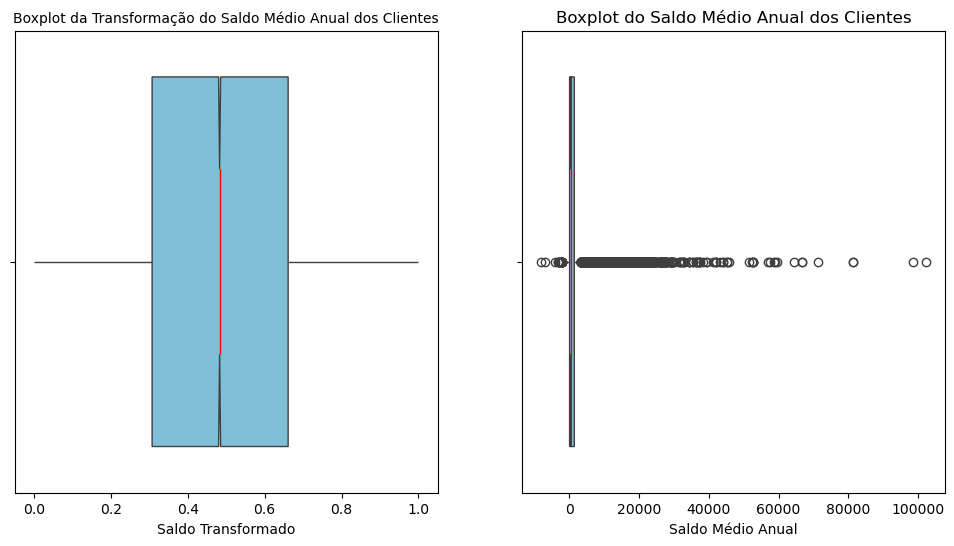

In [17]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["balance"], kde=True)
plt.title("Distribuição da Transformação do Saldo Médio Anual dos Clientes", fontsize=10)
plt.xlabel("Saldo Transformado")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.histplot(X["balance"], kde=True)
plt.title("Distribuição do Saldo Médio Anual dos Clientes")
plt.xlabel("Saldo Médio Anual")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(Xt["balance"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Transformação do Saldo Médio Anual dos Clientes",  fontsize=10)
plt.xlabel("Saldo Transformado")
plt.subplot(1, 2, 2)
sns.boxplot(X["balance"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Saldo Médio Anual dos Clientes")
plt.xlabel("Saldo Médio Anual")
plt.show()

## Duração

Para melhorar a qualidade dos dados da variável *duration*, foi adotada uma abordagem em duas etapas. Primeiramente, aplicou-se a transformação da raiz quinta à variável *duration*. Isso envolveu elevar os valores a $\frac{1}{5}$ (ou seja, a raiz quinta). Essa transformação ajudou a reduzir a assimetria positiva dos dados e a mitigar a influência dos outliers.

Na sequência, foi realizada a winsorização dos dados transformados com limites [0.01, 0.02]. Isso significa que 1% dos valores mais baixos foram substituídos pelo valor no percentil de 1%, e 2% dos valores mais altos foram substituídos pelo valor no percentil de 98%. Essa etapa visou reduzir ainda mais o impacto dos outliers extremos.

Por fim, a variável *duration* foi normalizada para o intervalo [0, 1] a fim de padronizar a escala com as demais variáveis numéricas e facilitar análises futuras.

In [18]:
Xt['duration'] = mstats.winsorize(X['duration']**(1/5), limits=[0.01, 0.02])
Xt['duration'] = (Xt['duration'] - Xt['duration'].min()) / (Xt['duration'].max() - Xt['duration'].min())

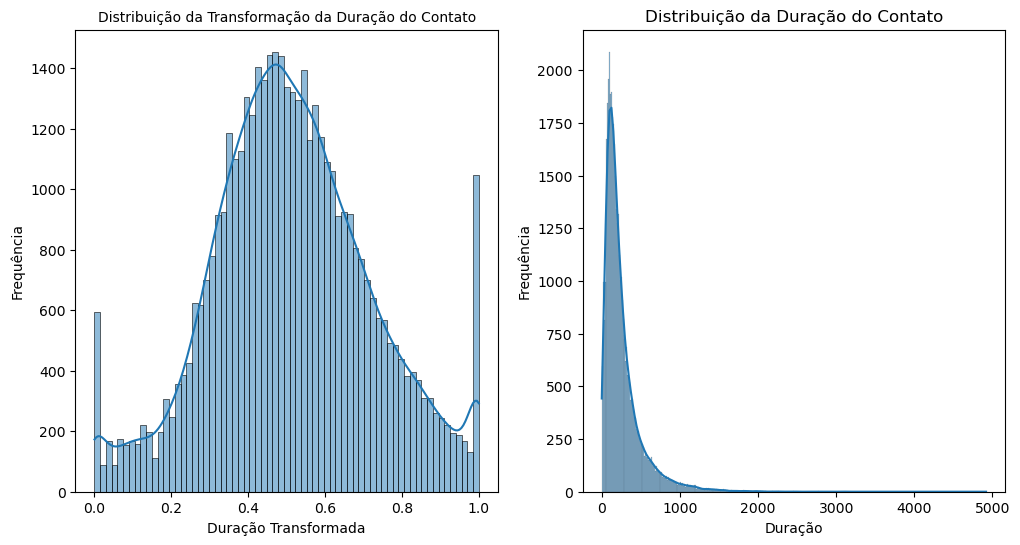

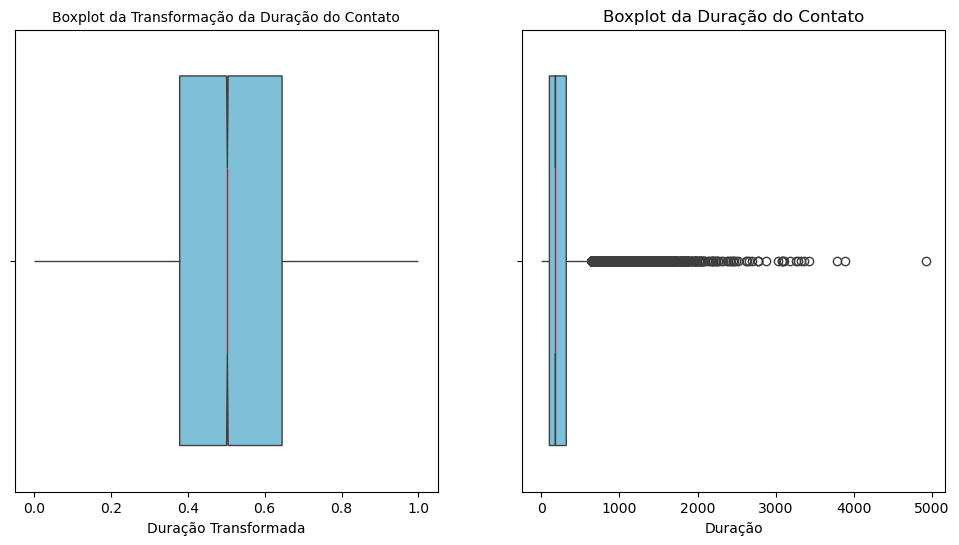

In [19]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["duration"], kde=True)
plt.title("Distribuição da Transformação da Duração do Contato", fontsize=10)
plt.xlabel("Duração Transformada")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.histplot(X["duration"], kde=True)
plt.title("Distribuição da Duração do Contato")
plt.xlabel("Duração")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(Xt["duration"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Transformação da Duração do Contato",  fontsize=10)
plt.xlabel("Duração Transformada")
plt.subplot(1, 2, 2)
sns.boxplot(X["duration"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Duração do Contato")
plt.xlabel("Duração")
plt.show()

## Transformação de Variáveis Categóricas em Numéricas

Utilizamos one-hot encoding para transformar variáveis categóricas em variáveis numéricas

In [24]:
# Convertendo variáveis categóricas para numéricas usando codificação one-hot
Xt = pd.get_dummies(Xt, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month'])

# Matriz de correlação
Xt.corr()

KeyError: "None of [Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',\n       'month'],\n      dtype='object')] are in the [columns]"

In [25]:
for column in Xt.columns:
    if Xt[column].dtype == 'bool':
        Xt[column] = Xt[column].astype(int)
Xt.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.7575,0.7341,5,0.5936,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.5627,0.1306,5,0.4624,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.3515,0.0000,5,0.3169,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.6099,0.6696,5,0.3554,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.3515,0.0000,5,0.5256,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
Xt.to_pickle('Xt.pkl')
y = y.replace({'yes': 1, 'no': 0})
y.to_pickle('y.pkl')

# Resultados da Preparação dos Dados

A preparação dos dados é um passo crucial para garantir a qualidade e a eficácia dos modelos preditivos. A seguir, apresentamos os resultados das ações realizadas nessa fase, destacando as estatísticas descritivas, a comparação dos dados antes e depois da preparação, e a discussão sobre a qualidade dos dados preparados. 

Os resultados das ações de preparação dos dados foram significativos e mensuráveis. Após a remoção de outliers, a variância dos dados foi reduzida, resultando em uma distribuição mais uniforme e menos distorcida. A imputação de valores ausentes garantiu que não houvesse lacunas nos dados, melhorando a completude e a integridade dos dados. A transformação de variáveis categóricas em numéricas permitiu a utilização de uma maior variedade de algoritmos de aprendizado de máquina. As estatísticas descritivas pós-transformação mostraram um aumento na consistência dos dados. Os dados após a preparação destacaram melhorias substanciais na qualidade dos dados. A discussão sobre a qualidade dos dados preparados enfatizou a importância dessas ações para garantir que os dados estivessem prontos para a modelagem, com foco na completude, consistência e integridade dos dados.

# Conjunto de Treinamento e Validação

A aplicação das ações de preparação foi direcionada exclusivamente aos conjuntos de treinamento e validação, com o objetivo de assegurar a qualidade e a integridade dos dados utilizados para desenvolver e validar os modelos preditivos.

Inicialmente, os dados foram divididos em três subconjuntos: treinamento, validação e teste. Utilizamos a função train_test_split da biblioteca Scikit-learn para realizar essa divisão, alocando 80% dos dados para os conjuntos de treinamento e validação, e 20% para o conjunto de teste, que foi mantido separado para a avaliação final. Dentro dos 80% destinados ao treinamento e validação, dividimos novamente para obter 75% para o treinamento e 25% para a validação. Utilizamos o parâmetro stratify para garantir que a proporção das classes da variável target fosse mantida em todos os subconjuntos, assegurando uma representatividade consistente.

Um aspecto crucial do processo foi garantir que o conjunto de teste permanecesse intacto e sem modificações durante toda a preparação dos dados. Isolamos o conjunto de teste imediatamente após a divisão inicial, assegurando que ele não fosse incluído em nenhuma etapa subsequente de preparação ou transformação. Isso garante uma avaliação justa e objetiva do desempenho do modelo em dados novos, proporcionando uma estimativa realista de sua performance.

Após a preparação dos dados, verificamos cuidadosamente a integridade e representatividade dos conjuntos de treinamento e validação. Aplicamos técnicas de imputação para valores ausentes e remoção de outliers, garantindo que não houvesse lacunas ou valores extremos que pudessem distorcer o treinamento do modelo. As transformações de variáveis categóricas em numéricas e a normalização dos dados foram aplicadas exclusivamente aos conjuntos de treinamento e validação, preservando as características essenciais dos dados.

Além disso, realizamos verificações para garantir que a representatividade dos dados fosse mantida. Comparamos estatísticas descritivas antes e depois da preparação para assegurar que as proporções e distribuições permanecessem consistentes, permitindo que os modelos treinados fossem generalizáveis e robustos.

Em resumo, a divisão adequada e a preparação cuidadosa dos dados garantiram que os conjuntos de treinamento e validação estivessem prontos para a construção e validação de modelos preditivos eficientes. A preservação do conjunto de teste permitiu uma avaliação final justa, assegurando que os modelos desenvolvidos possam ser aplicados com confiança em dados reais.

# Reflexões Críticas

A análise crítica das ações de preparação dos dados revelou que, em geral, as técnicas aplicadas melhoraram significativamente a qualidade dos dados. No entanto, enfrentamos alguns desafios, como a potencial introdução de vieses durante a imputação de valores ausentes e a possível perda de informações valiosas com a remoção de outliers. Reconhecemos que algumas das decisões tomadas podem ter impactos nos resultados dos modelos, e é essencial considerar abordagens alternativas e mais sofisticadas para lidar com esses desafios no futuro.

A eficácia das ações de preparação foi avaliada continuamente, e refletimos sobre possíveis melhorias, como a utilização de técnicas de imputação mais avançadas (ex.: KNN Imputer) e uma análise mais aprofundada dos outliers antes de sua remoção. Essas reflexões são importantes para melhorar continuamente a abordagem de preparação dos dados e garantir a construção de modelos mais robustos e precisos.

# Conclusão

Este relatório detalhou o processo de preparação dos dados para o projeto de aprendizagem de máquina aplicado à campanha de marketing bancário. As etapas incluíram a remoção de outliers, imputação de valores ausentes, transformação de variáveis categóricas em numéricas e normalização dos dados, garantindo a integridade e a representatividade dos conjuntos de treinamento e validação.

A divisão dos dados foi feita de maneira sistemática, preservando o conjunto de teste para uma avaliação final justa. As ações de preparação melhoraram significativamente a qualidade dos dados, apesar de alguns desafios como a introdução de vieses e a possível perda de informações valiosas.

Em resumo, a preparação cuidadosa dos dados assegurou a construção de modelos preditivos robustos e precisos, prontos para serem aplicados em dados reais, destacando a importância desta etapa para o sucesso da modelagem preditiva e futuras campanhas de marketing.